In [1]:
%cd /Users/gwg/dmcm

/Users/gwg/dmcm


In [2]:
import numpy as np
import torch
import random
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
from   PIL import Image

from   data import GTExV8Config, GTExV8Dataset, loader
from   models import DCGANAE128, DPCCA

In [3]:
%matplotlib inline

In [4]:
cfg = GTExV8Config()

In [18]:
# directory = '/Users/gwg/dmcm/experiments/20190128_big_sweep/'\
#             'gtexv8_mode-dpcca_batch_size-256_seed-0_latent_dim-2_lr-0.0001_l1_coef-1.0_private_z-1_linear_gene_enc-1_clip-1'
directory = '/Users/gwg/dmcm/experiments/20190205_decaying_l1/'\
            'gtexv8_mode-dpcca_batch_size-128_seed-0_latent_dim-20_lr-0.0001_l1_coef-1.5_em_iters-1_clip-1'
  
state = torch.load(directory + '/model.pt', map_location={'cuda:0': 'cpu'})
model = DPCCA(cfg, latent_dim=20)
model.load_state_dict(state)
model = model.pcca

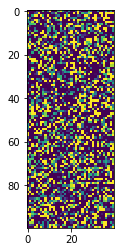

In [37]:
image_params = torch.cat([model.Lambda1, model.B1], dim=1).detach().numpy()
plt.imshow(image_params, vmin=0, vmax=1, interpolation='nearest')

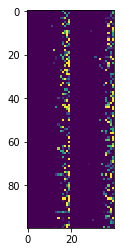

In [39]:
gene_params = torch.cat([model.Lambda2, model.B2], dim=1).detach().numpy()
plt.imshow(gene_params, vmin=0, vmax=1, interpolation='nearest')